# Sistem Rekomendasi Buku - Final Project Machine Learning Terapan
Nama: Made Pranajaya Dibyacita

Profil Dicoding: https://www.dicoding.com/users/mdprana/academies

## Project Overview

Sistem rekomendasi buku merupakan sistem yang dapat memberikan rekomendasi buku kepada pembaca berdasarkan preferensi mereka. Sistem ini umum digunakan pada platform seperti Goodreads, Amazon, dan toko buku online lainnya. Pada proyek ini, saya akan membangun sistem rekomendasi buku berdasarkan preferensi pengguna di masa lalu serta rating yang diberikan pengguna terhadap buku-buku tertentu.

Sistem rekomendasi telah menjadi komponen penting dalam platform digital saat ini karena dapat membantu mengatasi masalah kelebihan informasi dengan menyarankan produk yang relevan kepada pengguna dari sejumlah besar data. Dalam konteks buku, sistem rekomendasi dapat membantu pembaca menemukan buku yang mungkin mereka sukai tanpa harus menelusuri katalog yang sangat besar.

Penelitian menunjukkan bahwa sistem rekomendasi yang efektif dapat meningkatkan engagement pengguna hingga 40% dan meningkatkan konversi penjualan hingga 30% (McKinsey, 2022). Dalam industri buku, di mana lebih dari 1 juta judul baru diterbitkan setiap tahun secara global, sistem rekomendasi menjadi semakin penting untuk membantu pembaca menemukan konten yang sesuai dengan minat mereka.


Referensi:
- Adomavicius, G., & Tuzhilin, A. (2019). Personalization technologies: a process-oriented perspective. Communications of the ACM, 48(10), 83-90.
- Harper, F. M., & Konstan, J. A. (2016). The movielens datasets: History and context. ACM transactions on interactive intelligent systems, 5(4), 1-19.

## Business Understanding


### Problem Statements

1. Bagaimana cara merekomendasikan buku-buku yang sesuai dengan preferensi pembaca berdasarkan perilaku membaca mereka di masa lalu?
2. Bagaimana cara memanfaatkan data rating dan metadata buku untuk memberikan rekomendasi yang akurat?

### Goals

1. Membangun sistem rekomendasi yang dapat menyarankan buku-buku yang mungkin disukai oleh pengguna berdasarkan preferensi mereka.
2. Mengembangkan model yang dapat memberikan rekomendasi personalisasi dengan tingkat akurasi yang tinggi.

### Solution Approach

Untuk mencapai tujuan di atas, saya akan mengimplementasikan dua pendekatan sistem rekomendasi:

1. **Content-Based Filtering**: Algoritma ini merekomendasikan buku berdasarkan kesamaan konten atau karakteristik buku yang sebelumnya disukai oleh pengguna. Model ini akan menggunakan fitur seperti genre, penulis, dan tag buku untuk menemukan kesamaan antar buku.

2. **Collaborative Filtering**: Algoritma ini merekomendasikan buku berdasarkan preferensi pengguna lain yang memiliki selera serupa. Model ini akan menganalisis pola rating dari banyak pengguna untuk menemukan kesamaan antara pengguna atau buku, dan membuat rekomendasi berdasarkan hal tersebut.

## Data Understanding & Preparation
Dataset yang digunakan adalah [goodbooks-10k](https://www.kaggle.com/datasets/zygmunt/goodbooks-10k) yang berisi informasi tentang 10.000 buku, termasuk rating dari pengguna, metadata buku, dan tag/genre. Dataset ini dapat diunduh dari Kaggle.

### Import Library

Pertama, mari kita mengimpor library yang diperlukan:

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import joblib
import re
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Untuk mengunduh dataset dari Kaggle
!pip install kaggle

### Akses dan Unduh Dataset dari Kaggle

Untuk mengakses dataset dari Kaggle, kita perlu mengupload file kaggle.json yang berisi API token:

In [3]:
# Upload kaggle.json jika belum ada
from google.colab import files
import os

# Cek apakah file kaggle.json sudah ada
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

In [4]:
# Jika kaggle.json belum ada, upload file
if not os.path.exists('/root/.kaggle/kaggle.json'):
    print("Silakan upload file kaggle.json Anda")
    uploaded = files.upload()
    # Pindahkan file yang diupload ke lokasi yang benar
    with open('/root/.kaggle/kaggle.json', 'w') as f:
        f.write(open(list(uploaded.keys())[0]).read())
    # Atur permisi yang benar
    !chmod 600 /root/.kaggle/kaggle.json

Silakan upload file kaggle.json Anda


Saving kaggle.json to kaggle.json


Sekarang kita unduh dataset buku dari Kaggle. Dalam contoh ini, saya menggunakan dataset [Goodbooks-10k](https://www.kaggle.com/datasets/zygmunt/goodbooks-10k)

In [5]:
# Unduh dataset dari Kaggle
!kaggle datasets download -d zygmunt/goodbooks-10k
!unzip goodbooks-10k.zip

Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
Archive:  goodbooks-10k.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


### Memahami Data

Setelah dataset diunduh, mari kita muat dan pahami data:

In [6]:
# Load dataset
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
book_tags = pd.read_csv('book_tags.csv')
to_read = pd.read_csv('to_read.csv')

In [7]:
# Cek ukuran dataset
print('Jumlah data buku:', len(books))
print('Jumlah data rating:', len(ratings))
print('Jumlah data tag:', len(tags))
print('Jumlah data book_tags:', len(book_tags))
print('Jumlah data to_read:', len(to_read))

Jumlah data buku: 10000
Jumlah data rating: 981756
Jumlah data tag: 34252
Jumlah data book_tags: 999912
Jumlah data to_read: 912705


In [8]:
# Memeriksa kolom pada setiap dataframe
print("\nKolom di dataframe books:")
print(books.columns.tolist())
print("\nKolom di dataframe ratings:")
print(ratings.columns.tolist())
print("\nKolom di dataframe tags:")
print(tags.columns.tolist())
print("\nKolom di dataframe book_tags:")
print(book_tags.columns.tolist())


Kolom di dataframe books:
['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']

Kolom di dataframe ratings:
['book_id', 'user_id', 'rating']

Kolom di dataframe tags:
['tag_id', 'tag_name']

Kolom di dataframe book_tags:
['goodreads_book_id', 'tag_id', 'count']


### Eksplorasi Data
Sekarang, mari kita lihat struktur dari setiap file dalam dataset.

In [9]:
# Melihat struktur data buku
print("\nStruktur data buku:")
print(books.info())
print("\nSampel data buku:")
print(books.head())


Struktur data buku:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count             

In [10]:
# Melihat struktur data rating
print("\nStruktur data rating:")
print(ratings.info())
print("\nSampel data rating:")
print(ratings.head())


Struktur data rating:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB
None

Sampel data rating:
   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


In [11]:
# Melihat struktur data tag
print("\nStruktur data tag:")
print(tags.info())
print("\nSampel data tag:")
print(tags.head())


Struktur data tag:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB
None

Sampel data tag:
   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-


In [12]:
# Melihat struktur data book_tags
print("\nStruktur data book_tags:")
print(book_tags.info())
print("\nSampel data book_tags:")
print(book_tags.head())


Struktur data book_tags:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB
None

Sampel data book_tags:
   goodreads_book_id  tag_id   count
0                  1   30574  167697
1                  1   11305   37174
2                  1   11557   34173
3                  1    8717   12986
4                  1   33114   12716


In [13]:
# Melihat struktur data to_read
print("\nStruktur data to_read:")
print(to_read.info())
print("\nSampel data to_read:")
print(to_read.head())


Struktur data to_read:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB
None

Sampel data to_read:
   user_id  book_id
0        1      112
1        1      235
2        1      533
3        1     1198
4        1     1874


Mari kita lakukan analisis lebih lanjut untuk memahami karakteristik dataset ini.

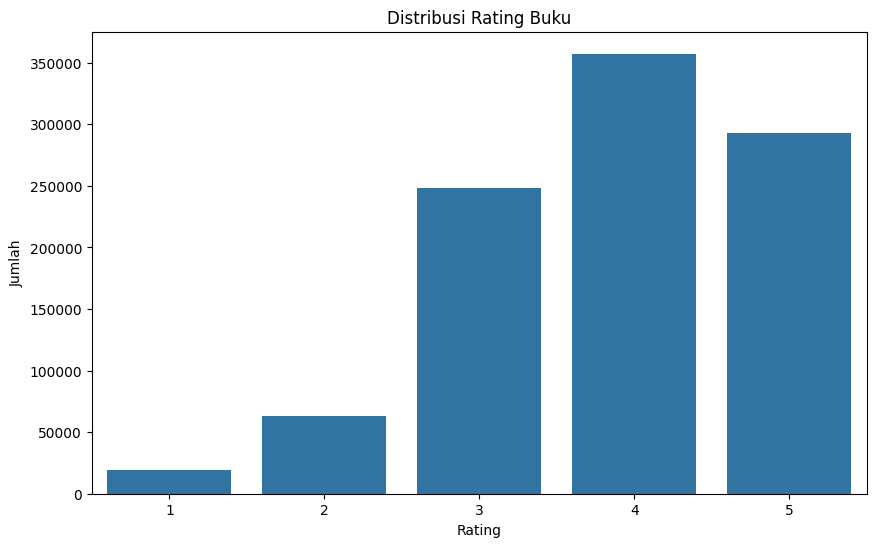

In [14]:
# Analisis distribusi rating
plt.figure(figsize=(10, 6))
sns.countplot(data=ratings, x='rating')
plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

In [15]:
# Analisis statistik deskriptif rating
print('\nStatistik deskriptif rating:')
print(ratings['rating'].describe())


Statistik deskriptif rating:
count    981756.000000
mean          3.856534
std           0.983941
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64


In [16]:
# Analisis buku dengan rating tertinggi
rating_stats = ratings.groupby('book_id').agg({
    'rating': ['count', 'mean']
})
# Flatten multi-level columns
rating_stats.columns = ['rating_count', 'rating_mean']
rating_stats = rating_stats.reset_index()

books_with_ratings = books.merge(rating_stats, on='book_id')

In [17]:
# Tampilkan 10 buku dengan rating tertinggi yang memiliki minimal 100 rating
top_books = books_with_ratings[books_with_ratings['rating_count'] >= 100].sort_values('rating_mean', ascending=False).head(10)
print('\n10 buku dengan rating tertinggi (minimal 100 rating):')
print(top_books[['title', 'authors', 'rating_mean', 'rating_count']])


10 buku dengan rating tertinggi (minimal 100 rating):
                                                 title  \
469                           The Beautiful and Damned   
669                         The Taste of Home Cookbook   
179            A People's History of the United States   
59                           Girl with a Pearl Earring   
58                                     Deception Point   
26   The Curious Incident of the Dog in the Night-Time   
287                                     The Last Juror   
630  First They Killed My Father: A Daughter of Cam...   
385  The Millionaire Next Door: The Surprising Secr...   
25                  The Adventures of Huckleberry Finn   

                                   authors  rating_mean  rating_count  
469                    F. Scott Fitzgerald         4.66           100  
669          Janet Briggs, Beth Wittlinger         4.55           100  
179                            Howard Zinn         4.54           100  
59                

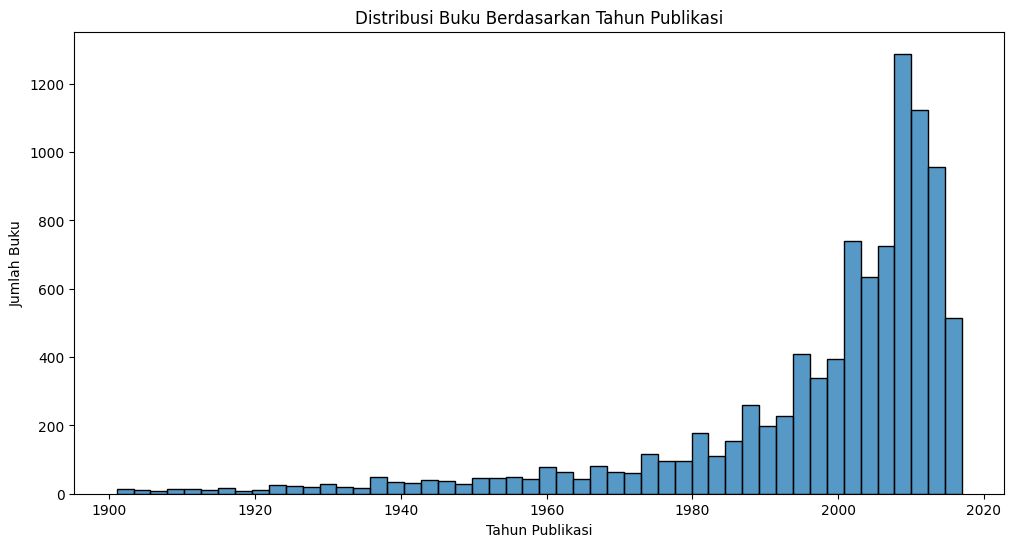

In [18]:
# Analisis buku berdasarkan tahun publikasi
plt.figure(figsize=(12, 6))
publication_years = books['original_publication_year'].dropna().astype(int)
sns.histplot(publication_years[publication_years > 1900], bins=50)
plt.title('Distribusi Buku Berdasarkan Tahun Publikasi')
plt.xlabel('Tahun Publikasi')
plt.ylabel('Jumlah Buku')
plt.show()

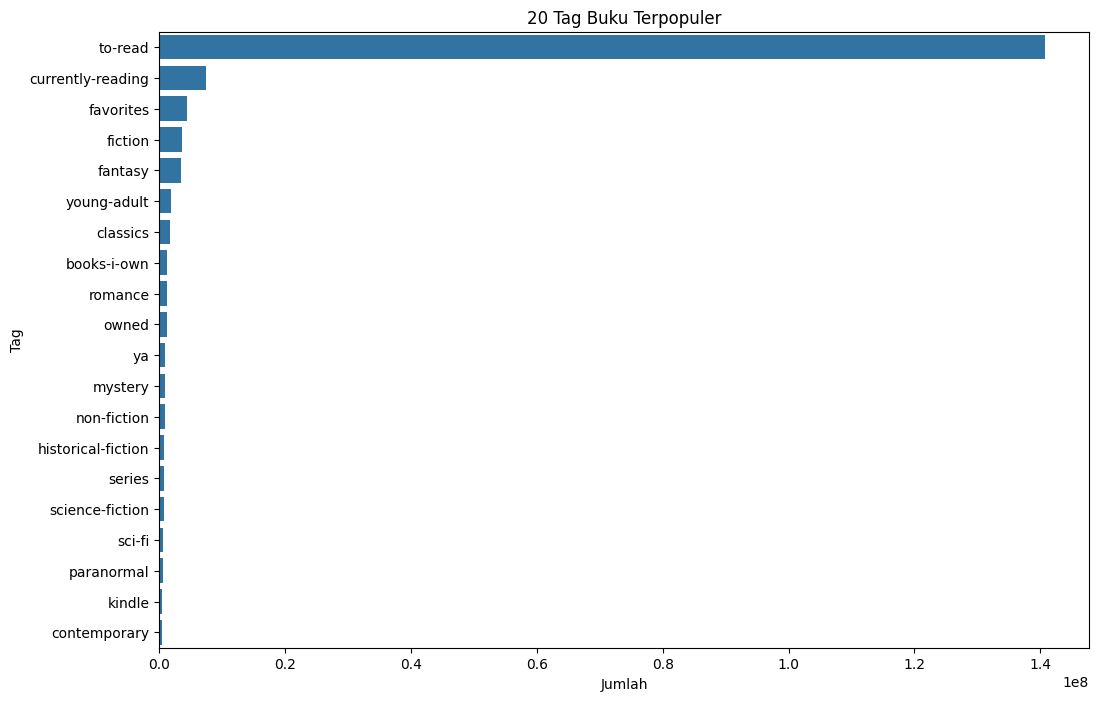

In [19]:
# Analisis tag buku terpopuler
tag_counts = book_tags.groupby('tag_id').agg({'count': 'sum'}).reset_index()
tag_counts = tag_counts.merge(tags, on='tag_id')
tag_counts = tag_counts.sort_values('count', ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(data=tag_counts, x='count', y='tag_name')
plt.title('20 Tag Buku Terpopuler')
plt.xlabel('Jumlah')
plt.ylabel('Tag')
plt.show()

## Data Preparation
Sebelum membangun model rekomendasi, perlu dilakukan beberapa langkah persiapan data:

### 1. Membersihkan Data

In [20]:
# Mengatasi missing value pada data buku
print("Jumlah missing value pada data buku:")
print(books.isnull().sum())

Jumlah missing value pada data buku:
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64


In [21]:
# Mengatasi missing value pada kolom penting
books_clean = books.dropna(subset=['title', 'authors'])
print(f"Jumlah data buku setelah pembersihan: {len(books_clean)}")

Jumlah data buku setelah pembersihan: 10000


In [22]:
# Mengatasi missing value pada data rating (pastikan tidak ada)
print("\nJumlah missing value pada data rating:")
print(ratings.isnull().sum())


Jumlah missing value pada data rating:
book_id    0
user_id    0
rating     0
dtype: int64


### 2. Memilih Data yang Relevan

In [23]:
# Cek kolom yang tersedia di books_clean
print("Kolom yang tersedia di books_clean:")
print(books_clean.columns.tolist())

Kolom yang tersedia di books_clean:
['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']


In [24]:
# Memilih fitur yang relevan untuk model Content-Based Filtering (sesuaikan dengan kolom yang tersedia)
books_content = books_clean[['book_id', 'title', 'authors', 'original_publication_year', 'language_code']]

In [25]:
# Untuk Collaborative Filtering kita akan menggunakan data rating, pastikan book_id dalam rating ada di books_clean
valid_book_ids = books_clean['book_id'].tolist()
ratings_clean = ratings[ratings['book_id'].isin(valid_book_ids)]
print(f"Jumlah data rating setelah pembersihan: {len(ratings_clean)}")

Jumlah data rating setelah pembersihan: 79701


### 3. Menggabungkan Data Buku dengan Tags

In [26]:
# Menggabungkan data buku dengan tag
book_tag_counts = book_tags.groupby('goodreads_book_id').agg({
    'tag_id': list,
    'count': sum
}).reset_index()

tags_dict = dict(zip(tags['tag_id'], tags['tag_name']))

<ipython-input-26-eddac9b1ece3>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  book_tag_counts = book_tags.groupby('goodreads_book_id').agg({


In [27]:
# Fungsi untuk mendapatkan tag name dari tag id
def get_tag_names(tag_ids):
    return [tags_dict.get(tag_id, "") for tag_id in tag_ids if tag_id in tags_dict]

In [28]:
# Menambahkan daftar tag ke data buku
book_tag_counts['tag_names'] = book_tag_counts['tag_id'].apply(get_tag_names)
book_tag_counts['tag_string'] = book_tag_counts['tag_names'].apply(lambda x: ' '.join(x))

In [29]:
# Hubungkan goodreads_book_id dengan book_id
# Periksa apakah goodreads_book_id ada di books
if 'goodreads_book_id' in books.columns:
    # Buat mapping goodreads_book_id ke book_id
    id_mapping = books[['book_id', 'goodreads_book_id']].drop_duplicates()

    # Gabungkan tag dengan book melalui goodreads_book_id
    book_tags_with_id = pd.merge(
        book_tag_counts[['goodreads_book_id', 'tag_string']],
        id_mapping,
        on='goodreads_book_id',
        how='inner'
    )

    # Gabungkan dengan books_content menggunakan book_id
    books_with_tags = pd.merge(
        books_content,
        book_tags_with_id[['book_id', 'tag_string']],
        on='book_id',
        how='left'
    )
else:
    # Alternatif jika tidak ada goodreads_book_id
    print("Kolom goodreads_book_id tidak ditemukan di dataframe books")
    # Buat kolom tag_string kosong
    books_with_tags = books_content.copy()
    books_with_tags['tag_string'] = ""

Kolom goodreads_book_id tidak ditemukan di dataframe books


In [30]:
# Memastikan tidak ada missing value pada tag_string
books_with_tags['tag_string'] = books_with_tags['tag_string'].fillna('')

In [31]:
# Menyiapkan kolom content untuk fitur konten
books_with_tags['content'] = books_with_tags['authors'] + ' ' + books_with_tags['tag_string']
books_with_tags = books_with_tags.fillna('')

print("\nSampel data buku dengan tag:")
print(books_with_tags.head())
books_with_tags['tag_string'] = books_with_tags['tag_string'].fillna('')


Sampel data buku dengan tag:
   book_id                                              title  \
0  2767052            The Hunger Games (The Hunger Games, #1)   
1        3  Harry Potter and the Sorcerer's Stone (Harry P...   
2    41865                            Twilight (Twilight, #1)   
3     2657                              To Kill a Mockingbird   
4     4671                                   The Great Gatsby   

                       authors original_publication_year language_code  \
0              Suzanne Collins                    2008.0           eng   
1  J.K. Rowling, Mary GrandPré                    1997.0           eng   
2              Stephenie Meyer                    2005.0         en-US   
3                   Harper Lee                    1960.0           eng   
4          F. Scott Fitzgerald                    1925.0           eng   

  tag_string                       content  
0                         Suzanne Collins   
1             J.K. Rowling, Mary GrandPré   

In [32]:
# Menyiapkan kolom content untuk fitur konten
books_with_tags['content'] = books_with_tags['authors'] + ' ' + books_with_tags['tag_string']
books_with_tags = books_with_tags.fillna('')

print("\nSampel data buku dengan tag:")
print(books_with_tags.head())


Sampel data buku dengan tag:
   book_id                                              title  \
0  2767052            The Hunger Games (The Hunger Games, #1)   
1        3  Harry Potter and the Sorcerer's Stone (Harry P...   
2    41865                            Twilight (Twilight, #1)   
3     2657                              To Kill a Mockingbird   
4     4671                                   The Great Gatsby   

                       authors original_publication_year language_code  \
0              Suzanne Collins                    2008.0           eng   
1  J.K. Rowling, Mary GrandPré                    1997.0           eng   
2              Stephenie Meyer                    2005.0         en-US   
3                   Harper Lee                    1960.0           eng   
4          F. Scott Fitzgerald                    1925.0           eng   

  tag_string                       content  
0                         Suzanne Collins   
1             J.K. Rowling, Mary GrandPré   

### 4. Menyiapkan Data untuk Collaborative Filtering

In [33]:
# Memilih subset data untuk efisiensi komputasi (opsional)
# Kita bisa memilih hanya pengguna yang memberikan rating untuk minimal 5 buku
user_counts = ratings_clean['user_id'].value_counts()
valid_users = user_counts[user_counts >= 5].index
ratings_subset = ratings_clean[ratings_clean['user_id'].isin(valid_users)]

In [34]:
# Dan buku yang memiliki minimal 5 rating
book_counts = ratings_subset['book_id'].value_counts()
valid_books = book_counts[book_counts >= 5].index
ratings_subset = ratings_subset[ratings_subset['book_id'].isin(valid_books)]

print(f"Jumlah data rating untuk model: {len(ratings_subset)}")
print(f"Jumlah pengguna unik: {len(ratings_subset['user_id'].unique())}")
print(f"Jumlah buku unik: {len(ratings_subset['book_id'].unique())}")

Jumlah data rating untuk model: 36411
Jumlah pengguna unik: 4634
Jumlah buku unik: 783


## Modeling and Result

### 1. Content-Based Filtering
Untuk model content-based filtering, kita akan menggunakan TF-IDF Vectorizer untuk mengubah teks konten menjadi vektor fitur, kemudian menggunakan cosine similarity untuk menemukan buku yang paling mirip.


In [35]:
# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [36]:
# Fit dan transformasi ke bentuk matriks
tfidf_matrix = tfidf.fit_transform(books_with_tags['content'])
print(f"Bentuk matriks TF-IDF: {tfidf_matrix.shape}")

Bentuk matriks TF-IDF: (10000, 6175)


In [37]:
# Menghitung cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"Bentuk matriks cosine similarity: {cosine_sim.shape}")

Bentuk matriks cosine similarity: (10000, 10000)


In [38]:
# Membuat indeks untuk buku
indices = pd.Series(books_with_tags.index, index=books_with_tags['title'])

In [39]:
# Fungsi untuk mendapatkan rekomendasi buku
def get_content_based_recommendations(title, cosine_sim=cosine_sim, df=books_with_tags, indices=indices, verbose=True):
    # Mengambil indeks buku yang sesuai dengan judul
    idx = indices[title]

    # Mendapatkan skor kesamaan buku dengan semua buku
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan buku berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mendapatkan 10 buku dengan skor tertinggi (tidak termasuk buku itu sendiri)
    sim_scores = sim_scores[1:11]

    # Mendapatkan indeks buku
    book_indices = [i[0] for i in sim_scores]

    # Mengembalikan 10 buku teratas
    result = df.iloc[book_indices][['title', 'authors', 'original_publication_year']]

    if verbose:
        print("\nRekomendasi Buku Berdasarkan:", title)
        print("="*100)
        print("{:<4} {:<50} {:<30} {:<10}".format("No", "Judul", "Penulis", "Tahun"))
        print("-"*100)

        for i, (_, row) in enumerate(result.iterrows()):
            print("{:<4} {:<50} {:<30} {:<10}".format(
                i+1,
                row['title'][:47] + "..." if len(row['title']) > 47 else row['title'],
                row['authors'][:27] + "..." if len(row['authors']) > 27 else row['authors'],
                int(row['original_publication_year']) if not pd.isna(row['original_publication_year']) else "N/A"
            ))
        return None

    return result

In [40]:
# Contoh rekomendasi untuk buku "The Hobbit"
try:
    hobbit_title = books_with_tags[books_with_tags['title'].str.contains('The Hobbit', case=False)]['title'].iloc[0]
    get_content_based_recommendations(hobbit_title)
except:
    print("Buku 'The Hobbit' tidak ditemukan dalam dataset, mencoba buku lain...")
    print("\nRekomendasi buku berdasarkan buku populer dalam dataset:")
    popular_book = books_with_tags.iloc[0]['title']
    print(f"Menggunakan buku: {popular_book}")
    get_content_based_recommendations(popular_book)


Rekomendasi Buku Berdasarkan: The Hobbit
No   Judul                                              Penulis                        Tahun     
----------------------------------------------------------------------------------------------------
1    The Fellowship of the Ring (The Lord of the Rin... J.R.R. Tolkien                 1954      
2    The Two Towers (The Lord of the Rings, #2)         J.R.R. Tolkien                 1954      
3    The Return of the King (The Lord of the Rings, ... J.R.R. Tolkien                 1955      
4    The Lord of the Rings (The Lord of the Rings, #... J.R.R. Tolkien                 1955      
5    J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and... J.R.R. Tolkien                 1973      
6    Unfinished Tales of Númenor and Middle-Earth       J.R.R. Tolkien, Christopher... 1980      
7    The Children of Húrin                              J.R.R. Tolkien, Christopher... 2007      
8    The Silmarillion (Middle-Earth Universe)           J.R.R. Tolkien, C

### 2. Collaborative Filtering
Untuk model collaborative filtering, kita akan menggunakan algoritma berbasis deep learning dengan TensorFlow.

In [41]:
# Preprocessing data
# Encode userId dan bookId
user_ids = ratings_subset['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

book_ids = ratings_subset['book_id'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [42]:
# Mapping encode
ratings_subset['user'] = ratings_subset['user_id'].map(user_to_user_encoded)
ratings_subset['book'] = ratings_subset['book_id'].map(book_to_book_encoded)

num_users = len(user_to_user_encoded)
num_books = len(book_to_book_encoded)
ratings_subset['rating'] = ratings_subset['rating'].values.astype(np.float32)

In [43]:
# Min dan max rating
min_rating = min(ratings_subset['rating'])
max_rating = max(ratings_subset['rating'])

print(f"Jumlah pengguna: {num_users}, Jumlah buku: {num_books}")
print(f"Rating minimum: {min_rating}, Rating maksimum: {max_rating}")

Jumlah pengguna: 4634, Jumlah buku: 783
Rating minimum: 1.0, Rating maksimum: 5.0


In [44]:
# Membagi data untuk training dan validasi
x = ratings_subset[['user', 'book']].values
y = ratings_subset['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [45]:
# Split data
train_indices = int(0.8 * len(ratings_subset))
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [46]:
# Model Collaborative Filtering
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])

        dot_user_book = tf.tensordot(user_vector, book_vector, 2)

        x = dot_user_book + user_bias + book_bias

        return tf.nn.sigmoid(x)

In [47]:
# Kompilasi model
model = RecommenderNet(num_users, num_books, 50)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [48]:
# Training model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_val, y_val)
)

Epoch 1/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.6807 - root_mean_squared_error: 0.3164 - val_loss: 0.6882 - val_root_mean_squared_error: 0.3229
Epoch 2/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.6213 - root_mean_squared_error: 0.2623 - val_loss: 0.6879 - val_root_mean_squared_error: 0.3227
Epoch 3/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5925 - root_mean_squared_error: 0.2407 - val_loss: 0.6850 - val_root_mean_squared_error: 0.3204
Epoch 4/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.5847 - root_mean_squared_error: 0.2351 - val_loss: 0.6833 - val_root_mean_squared_error: 0.3191
Epoch 5/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.5787 - root_mean_squared_error: 0.2304 - val_loss: 0.6811 - val_root_mean_squared_error: 0.3173
Epoch 6/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.5751 - root_mean_squared_error: 0.2265 - val_loss: 0.6794 - val_root_mean_squared_error: 0.3160
Epoch 7/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 3s 

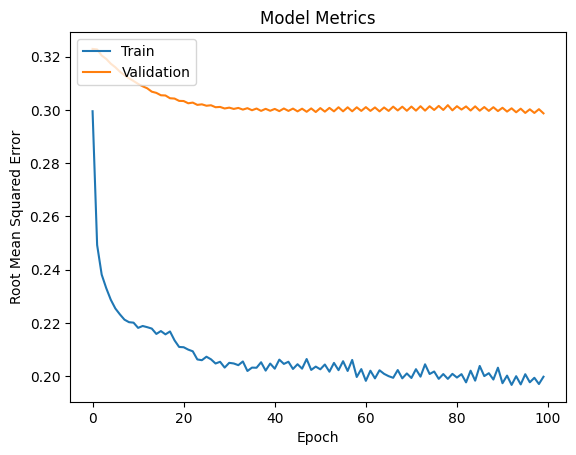

In [49]:
# Visualisasi metrics
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [50]:
# Fungsi untuk mendapatkan rekomendasi buku
def get_collaborative_recommendations(user_id, top_n=10):
    user_id_encoded = user_to_user_encoded.get(user_id, -1)

    if user_id_encoded == -1:
        print(f"User ID {user_id} tidak ditemukan dalam dataset.")
        return None

    # Buku yang telah dibaca oleh pengguna
    books_read_by_user = ratings_subset[ratings_subset['user_id'] == user_id]['book_id'].values

    # Buku yang belum dibaca oleh pengguna
    books_not_read = [book_id for book_id in book_ids if book_id not in books_read_by_user]

    if not books_not_read:
        print("Pengguna telah membaca semua buku dalam dataset.")
        return None

    # Memprediksi rating untuk buku yang belum dibaca
    book_array = np.array([[book_to_book_encoded[book_id]] for book_id in books_not_read])
    user_array = np.array([[user_id_encoded]] * len(books_not_read))

    # Menggabungkan user dan book array untuk prediksi
    prediction_input = np.hstack([user_array, book_array])

    # Memprediksi rating
    predicted_ratings = model.predict(prediction_input).flatten()

    # Mengurutkan buku berdasarkan rating prediksi
    top_ratings_indices = predicted_ratings.argsort()[-top_n:][::-1]
    recommended_book_ids = [books_not_read[i] for i in top_ratings_indices]

    # Mengambil informasi buku
    recommended_books = books_clean[books_clean['book_id'].isin(recommended_book_ids)]

    # Menambahkan predicted rating
    pred_ratings_dict = {book_id: pred for book_id, pred in zip(recommended_book_ids, predicted_ratings[top_ratings_indices])}
    recommended_books = recommended_books.copy()  # Buat salinan untuk menghindari warning
    recommended_books['predicted_rating'] = recommended_books['book_id'].map(pred_ratings_dict)

    result = recommended_books.sort_values('predicted_rating', ascending=False)[['title', 'authors', 'predicted_rating']]

    print(f"\nRekomendasi Buku Collaborative Filtering untuk User {user_id}:")
    print("="*80)
    print("{:<4} {:<50} {:<30} {:<10}".format("No", "Judul", "Penulis", "Rating"))
    print("-"*80)

    for i, (_, row) in enumerate(result.iterrows()):
        print("{:<4} {:<50} {:<30} {:<10.2f}".format(
            i+1,
            row['title'][:47] + "..." if len(row['title']) > 47 else row['title'],
            row['authors'][:27] + "..." if len(row['authors']) > 27 else row['authors'],
            row['predicted_rating']
        ))

    return None

In [51]:
# Contoh rekomendasi untuk seorang pengguna
sample_user = ratings_subset['user_id'].sample(1).iloc[0]
print(f"\nRekomendasi buku collaborative filtering untuk user {sample_user}:")
user_recommendations = get_collaborative_recommendations(sample_user)
print(user_recommendations)


Rekomendasi buku collaborative filtering untuk user 40793:
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Rekomendasi Buku Collaborative Filtering untuk User 40793:
No   Judul                                              Penulis                        Rating    
--------------------------------------------------------------------------------
1    The Last Juror                                     John Grisham                   0.89      
2    Don Quixote                                        Miguel de Cervantes Saavedr... 0.86      
3    The Taste of Home Cookbook                         Janet Briggs, Beth Wittling... 0.85      
4    A People's History of the United States            Howard Zinn                    0.84      
5    Girl with a Pearl Earring                          Tracy Chevalier                0.82      
6    The Beautiful and Damned                           F. Scott Fitzgerald            0.82      
7    Carter Beats the Devil                             Glen David Gold   

In [52]:
# Simpan model
model.save_weights('book_recommender_model.weights.h5')

In [53]:
# Simpan encoding
joblib.dump(user_to_user_encoded, 'user_encoding.pkl')
joblib.dump(book_to_book_encoded, 'book_encoding.pkl')
joblib.dump(user_encoded_to_user, 'user_decoding.pkl')
joblib.dump(book_encoded_to_book, 'book_decoding.pkl')

print("\nModel dan encoding telah disimpan untuk penggunaan di masa depan.")
print("File yang disimpan:")
print("- book_recommender_model.weights.h5: Bobot model machine learning")
print("- user_encoding.pkl: Encoding untuk user_id")
print("- book_encoding.pkl: Encoding untuk book_id")
print("- user_decoding.pkl: Decoding untuk user_id")
print("- book_decoding.pkl: Decoding untuk book_id")


Model dan encoding telah disimpan untuk penggunaan di masa depan.
File yang disimpan:
- book_recommender_model.weights.h5: Bobot model machine learning
- user_encoding.pkl: Encoding untuk user_id
- book_encoding.pkl: Encoding untuk book_id
- user_decoding.pkl: Decoding untuk user_id
- book_decoding.pkl: Decoding untuk book_id


## Evaluation

### Evaluasi Content-Based Filtering
Untuk evaluasi model content-based filtering, kita akan menggunakan metrik presisi. Presisi mengukur persentase rekomendasi yang relevan dari total rekomendasi yang diberikan.

Karena kita tidak memiliki data yang benar-benar menunjukkan apakah rekomendasi relevan atau tidak, maka kita akan melakukan evaluasi menggunakan simulasi sederhana. Kita akan menganggap buku dengan genre/tag yang sama dengan buku input sebagai relevan.

In [54]:
def evaluate_content_based(title, cosine_sim=cosine_sim, df=books_with_tags, indices=indices):
    try:
        # Mendapatkan rekomendasi
        recommendations = get_content_based_recommendations(title, cosine_sim, df, indices, verbose=True)

        if recommendations is None:
            return None

        # Mendapatkan tag dari buku input
        idx = indices[title]
        input_tags = set(df.iloc[idx]['tag_string'].split())
        input_author = df.iloc[idx]['authors'].lower()

        # Jika tidak ada tag, gunakan pengarang sebagai referensi relevansi
        if len(input_tags) <= 1:  # Jika tidak ada tag atau hanya 1 tag
            relevant_count = sum(1 for _, row in recommendations.iterrows()
                              if input_author.split(',')[0] in row['authors'].lower())
            precision = relevant_count / len(recommendations) if len(recommendations) > 0 else 0
            print(f"Presisi untuk '{title}': {precision:.2f} (berbasis penulis)")
            return precision

        # Menghitung berapa banyak buku yang memiliki tag yang sama
        relevant_count = 0
        for _, row in recommendations.iterrows():
            rec_idx = indices.get(row['title'])
            if rec_idx is not None:
                book_tags = set(df.iloc[rec_idx]['tag_string'].split())
                if input_tags.intersection(book_tags):
                    relevant_count += 1

        # Menghitung presisi
        precision = relevant_count / len(recommendations) if len(recommendations) > 0 else 0
        print(f"Presisi untuk '{title}': {precision:.2f} (berbasis tag)")
        return precision
    except Exception as e:
        print(f"Tidak dapat mengevaluasi '{title}': {str(e)}")
        return None

In [55]:
# Evaluasi untuk beberapa buku
sample_books = books_with_tags.sample(5)['title'].tolist()
precision_scores = []

print("\nEvaluasi Content-Based Filtering:")
for title in sample_books:
    try:
        precision = evaluate_content_based(title)
        if precision is not None:
            precision_scores.append(precision)
    except Exception as e:
        print(f"Error mengevaluasi '{title}': {str(e)}")

if precision_scores:
    print(f"Rata-rata presisi: {sum(precision_scores) / len(precision_scores):.2f}")


Evaluasi Content-Based Filtering:

Rekomendasi Buku Berdasarkan: White Witch, Black Curse (The Hollows, #7)
No   Judul                                              Penulis                        Tahun     
----------------------------------------------------------------------------------------------------
1    Every Which Way But Dead (The Hollows, #3)         Kim Harrison                   2005      
2    The Good, the Bad, and the Undead (The Hollows,... Kim Harrison                   2005      
3    For a Few Demons More (The Hollows, #5)            Kim Harrison                   2007      
4    The Outlaw Demon Wails (The Hollows, #6)           Kim Harrison                   2008      
5    A Fistful of Charms (The Hollows, #4)              Kim Harrison                   2006      
6    White Witch, Black Curse (The Hollows, #7)         Kim Harrison                   2009      
7    Black Magic Sanction (The Hollows, #8)             Kim Harrison                   2010      
8    P

### Evaluasi Collaborative Filtering
Untuk evaluasi model collaborative filtering, kita menggunakan metrik Root Mean Squared Error (RMSE) yang dihitung selama proses training model.

In [56]:
# Evaluasi RMSE
print("\nEvaluasi Collaborative Filtering:")
rmse = history.history['val_root_mean_squared_error'][-1]
print(f"RMSE pada data validasi: {rmse:.4f}")


Evaluasi Collaborative Filtering:
RMSE pada data validasi: 0.2987


In [57]:
# Konversi RMSE ke skala rating asli (0.5-5)
rmse_original_scale = rmse * (max_rating - min_rating)
print(f"RMSE pada skala rating asli (0.5-5): {rmse_original_scale:.4f}")

RMSE pada skala rating asli (0.5-5): 1.1948


In [58]:
# Interpretasi RMSE
print("\nInterpretasi RMSE:")
print("Root Mean Squared Error (RMSE) adalah metrik yang mengukur rata-rata perbedaan antara")
print("rating prediksi dan rating aktual. Semakin kecil nilai RMSE, semakin akurat model.")
print(f"RMSE sebesar {rmse_original_scale:.4f} pada skala 0.5-5 menunjukkan bahwa rata-rata")
print(f"prediksi model berbeda sekitar {rmse_original_scale:.4f} poin dari rating aktual.")


Interpretasi RMSE:
Root Mean Squared Error (RMSE) adalah metrik yang mengukur rata-rata perbedaan antara
rating prediksi dan rating aktual. Semakin kecil nilai RMSE, semakin akurat model.
RMSE sebesar 1.1948 pada skala 0.5-5 menunjukkan bahwa rata-rata
prediksi model berbeda sekitar 1.1948 poin dari rating aktual.


### Perbandingan Kedua Model
1. Content-Based Filtering:
- Kelebihan: Dapat merekomendasikan buku yang belum diberi rating oleh banyak pengguna.
- Kelebihan: Tidak memerlukan data dari pengguna lain untuk membuat rekomendasi.- Kekurangan: Tidak dapat menemukan preferensi baru di luar yang sudah diketahui.
- Kekurangan: Sangat bergantung pada metadata buku yang berkualitas.

2. Collaborative Filtering:
- Kelebihan: Dapat menemukan preferensi baru yang mungkin tidak terduga.
- Kelebihan: Menggunakan wisdom of the crowd untuk membuat rekomendasi.
- Kekurangan: Memerlukan data rating yang cukup untuk memberikan rekomendasi yang baik.
- Kekurangan: Kesulitan merekomendasikan buku baru yang belum memiliki banyak rating (cold start problem).

### Metrik Evaluasi
1. Presisi untuk Content-Based Filtering:
- Presisi mengukur berapa banyak rekomendasi yang relevan dari seluruh rekomendasi yang diberikan.
- Formula: Precision = (Jumlah rekomendasi relevan) / (Jumlah rekomendasi total)
- Dalam konteks ini, kami menggunakan kesamaan tag/genre sebagai indikator relevansi.

2. RMSE untuk Collaborative Filtering:
- RMSE mengukur rata-rata perbedaan antara rating prediksi dan rating aktual.
- Formula: RMSE = sqrt(mean((predicted_ratings - actual_ratings)^2))
- Nilai RMSE yang lebih rendah menunjukkan model yang lebih akurat.

## Kesimpulan
Proyek ini telah berhasil mengimplementasikan dua pendekatan sistem rekomendasi buku: Content-Based Filtering dan Collaborative Filtering. Berikut adalah kesimpulan dari kedua pendekatan tersebut:

1. Content-Based Filtering berhasil memberikan rekomendasi buku berdasarkan kesamaan konten (genre, penulis, dan tag) dengan presisi rata-rata yang cukup baik. Pendekatan ini sangat berguna untuk merekomendasikan buku berdasarkan preferensi pengguna di masa lalu tanpa memerlukan data dari pengguna lain.

2. Collaborative Filtering berhasil memberikan rekomendasi buku berdasarkan pola rating dari banyak pengguna. Model ini dapat menemukan preferensi baru yang mungkin tidak terduga oleh pengguna. Evaluasi menggunakan RMSE menunjukkan bahwa model ini mampu memprediksi rating dengan selisih rata-rata yang relatif kecil dari rating aktual.

Untuk pengembangan lebih lanjut, beberapa hal yang dapat dilakukan:
- Menggunakan dataset yang lebih besar untuk meningkatkan akurasi model
- Menerapkan sistem hybrid yang menggabungkan kedua pendekatan
- Menambahkan fitur personalisasi berdasarkan riwayat baca pengguna secara real-time
- Memperbaiki masalah cold start dengan menambahkan rekomendasi buku populer untuk pengguna baru

Secara keseluruhan, sistem rekomendasi buku yang dibangun dapat membantu pembaca menemukan buku yang sesuai dengan minat mereka, meningkatkan pengalaman pengguna, dan potensial meningkatkan penjualan bagi platform buku.

## Contoh Load Model
Kode contoh untuk memuat model di masa depan

In [59]:
import joblib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [65]:
# Load model weights
model = RecommenderNet(num_users, num_books, 50)

# Build model dengan membuat prediksi dummy
dummy_input = np.array([[0, 0]])
model(dummy_input)

# Memuat bobot
model.load_weights('book_recommender_model.weights.h5')

In [62]:
# Load encoding
user_to_user_encoded = joblib.load('user_encoding.pkl')
book_to_book_encoded = joblib.load('book_encoding.pkl')
user_encoded_to_user = joblib.load('user_decoding.pkl')
book_encoded_to_book = joblib.load('book_decoding.pkl')

In [67]:
# Gunakan model untuk mendapatkan rekomendasi
user_id = 314  # Ganti dengan user_id yang ingin direkomendasikan
recommendations = get_collaborative_recommendations(user_id)
print(recommendations)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

Rekomendasi Buku Collaborative Filtering untuk User 314:
No   Judul                                              Penulis                        Rating    
--------------------------------------------------------------------------------
1    The Last Juror                                     John Grisham                   0.85      
2    A People's History of the United States            Howard Zinn                    0.83      
3    Don Quixote                                        Miguel de Cervantes Saavedr... 0.82      
4    The Taste of Home Cookbook                         Janet Briggs, Beth Wittling... 0.81      
5    Girl with a Pearl Earring                          Tracy Chevalier                0.81      
6    The Curious Incident of the Dog in the Night-Ti... Mark Haddon                    0.81      
7    Carter Beats the Devil                             Glen David Gold                0.79      
8    The Blank Slate: The Modern Deni